## Gradient Descent and its Variations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

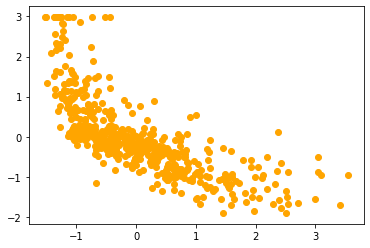

In [2]:
data = pd.read_csv('./data/boston_housing.csv')
scaler = StandardScaler()

data = data.dropna()

X = data['lstat'].values
X = X.reshape(-1, 1)
X = scaler.fit_transform(X)

y = data['medv'].values
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

plt.scatter(x = X, y = y, color='orange')
plt.show()

### Gradient Descent

In [3]:
class MyGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            for i in range(N):
                Xi = X[i, :]
                yi = y[i, :]
                
                f = yi - (self.w * Xi + self.b)
                                
                self.w -= self.learning_rate * (-2 * Xi.dot(f.T).sum() / N)
                self.b -= self.learning_rate * (-2 * f.sum() / N)

            loss = mean_squared_error(y, (self.w * X + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [4]:
model = MyGradientDescent(learning_rate = 0.01)
history = model.fit(X_train, y_train, 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0129236386713547)
Epoch: 100, Loss: 0.4836365268936342)
Epoch: 200, Loss: 0.4717052013642623)
Epoch: 300, Loss: 0.4714309129514397)
Epoch: 400, Loss: 0.4714244612434121)
Epoch: 500, Loss: 0.47142429776534295)
Epoch: 600, Loss: 0.4714242918194498)
Epoch: 700, Loss: 0.4714242913200272)
Epoch: 800, Loss: 0.47142429124768254)
Epoch: 900, Loss: 0.47142429123592733)


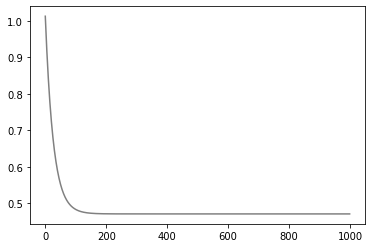

In [5]:
plt.plot(history, color='gray')

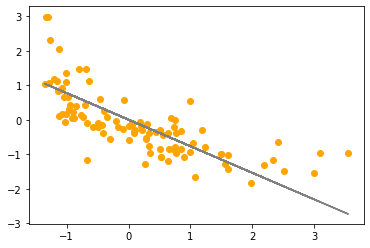

In [6]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [7]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.564486
1,-1.842924,-1.518349
2,-0.993992,-1.142846
3,-1.081062,-0.403710
4,-0.145059,0.339743
...,...,...
97,0.268523,0.311688
98,-0.330083,-0.643255
99,-0.286548,-0.387525
100,-0.776317,-0.944305


### Batch Gradient Descent

In [8]:
class MyBatchGradientDescent():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
          
    def fit(self, X, y, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            f = y - (self.w * X + self.b)
    
            self.w -= self.learning_rate * (-2 * X.dot(f.T).sum() / N)
            self.b -= self.learning_rate * (-2 * f.sum() / N)
        
            loss = mean_squared_error(y, (self.w * X + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [9]:
model = MyBatchGradientDescent(learning_rate = 0.01)
history = model.fit(X_train, y_train, 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 1.0196646159305187)
Epoch: 100, Loss: 0.6771864255196849)
Epoch: 200, Loss: 0.6660374373514026)
Epoch: 300, Loss: 0.6655591433109558)
Epoch: 400, Loss: 0.6655383319190815)
Epoch: 500, Loss: 0.6655374258171037)
Epoch: 600, Loss: 0.6655373863654891)
Epoch: 700, Loss: 0.6655373846477667)
Epoch: 800, Loss: 0.6655373845729767)
Epoch: 900, Loss: 0.6655373845697203)


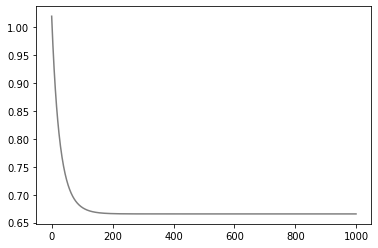

In [10]:
plt.plot(history, color='gray')

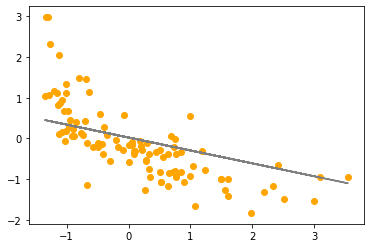

In [11]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [12]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.213164
1,-1.842924,-0.606138
2,-0.993992,-0.451438
3,-1.081062,-0.146928
4,-0.145059,0.159361
...,...,...
97,0.268523,0.147803
98,-0.330083,-0.245616
99,-0.286548,-0.140260
100,-0.776317,-0.369643


### Stochastic Gradient Descent

#### Python Implementation

In [13]:
class MySGD():
    def __init__(self, learning_rate):
        self.learning_rate = learning_rate
        self.w = 0
        self.b = 0
    
    def _get_batch(self, X, y, batch_size):
        indexes = np.random.randint(len(X), size=batch_size)
        return X[indexes,:], y[indexes,:]
    
    def fit(self, X, y, batch_size = 32, epochs = 100):
        N = len(X)
        history = []
        
        for e in range(epochs):
            indexes = np.random.randint(N, size=batch_size)
            X_batch, y_batch = self._get_batch(X, y, batch_size)
            
            f = y_batch - (self.w * X_batch + self.b)
    
            self.w -= self.learning_rate * (-2 * X_batch.dot(f.T).sum() / N)
            self.b -= self.learning_rate * (-2 * f.sum() / N)
        
            loss = mean_squared_error(y_batch, (self.w * X_batch + self.b))
                                      
            if e % 100 == 0:
                print(f"Epoch: {e}, Loss: {loss})")
            
            history.append(loss)
                                      
        return history
                
    def predict(self, X):
        return self.w * X + self.b

In [14]:
model = MySGD(learning_rate = 0.01)
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1000)

predictions = model.predict(X_test)

Epoch: 0, Loss: 0.6988926574320093)
Epoch: 100, Loss: 0.9368940114609687)
Epoch: 200, Loss: 0.38274490789600646)
Epoch: 300, Loss: 0.4015009827201944)
Epoch: 400, Loss: 0.6096862052672033)
Epoch: 500, Loss: 0.4814101552252322)
Epoch: 600, Loss: 0.3249126077150954)
Epoch: 700, Loss: 0.6309038218016978)
Epoch: 800, Loss: 0.6394188763053792)
Epoch: 900, Loss: 0.6521754136964174)


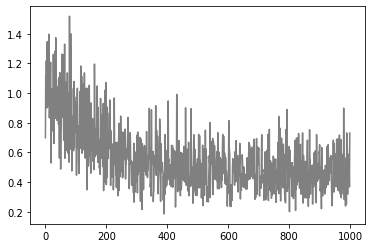

In [15]:
plt.plot(history, color='gray')

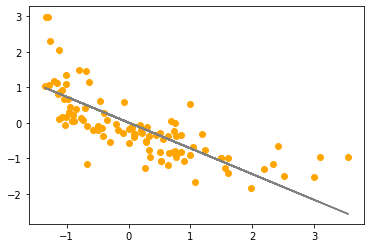

In [16]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [17]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'Predictions': predictions.flatten()
})

,Actual Value,Predictions
0,-0.221246,-0.529533
1,-1.842924,-1.428056
2,-0.993992,-1.074338
3,-1.081062,-0.378085
4,-0.145059,0.322235
...,...,...
97,0.268523,0.295808
98,-0.330083,-0.603732
99,-0.286548,-0.362838
100,-0.776317,-0.887316


#### Using Sci-Kit Learn

In [18]:
sgd_model = SGDRegressor(max_iter=10000, alpha=0.1)
sgd_model.fit(X_train, y_train)

sgd_predictions = sgd_model.predict(X_test)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


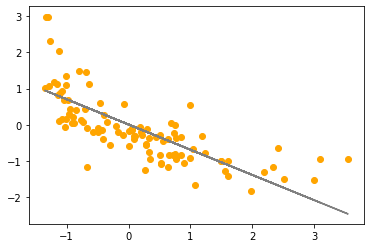

In [19]:
plt.scatter(x = X_test, y = y_test, color='orange')
values = np.column_stack((X_test, sgd_predictions))
plt.plot(values[:, 0], values[:, 1], color='gray')

plt.show()

In [20]:
pd.DataFrame({
    'Actual Value': y_test.flatten(),
    'SGD Model Prediction': sgd_predictions,
})

,Actual Value,SGD Model Prediction
0,-0.221246,-0.509294
1,-1.842924,-1.373452
2,-0.993992,-1.033263
3,-1.081062,-0.363639
4,-0.145059,0.309896
...,...,...
97,0.268523,0.284479
98,-0.330083,-0.580656
99,-0.286548,-0.348976
100,-0.776317,-0.853393
